In [1]:
using Pkg
Pkg.activate("./demo/Project.toml");

  Activating project at `~/Documents/Jupyter Notebooks/Hidden Physics Models/demo`


In [2]:
using SpecialFunctions
using DelimitedFiles
using MLDatasets
using Parameters
using ImageCore
using Random
using Plots
using Flux

# Introducción a las redes neuronales

<ul>
    <li>Todo algoritmo de <b>Deep Learning</b> es <b>Machine Learning</b> pero no todo algoritmo de Machine Learning se considera como Deep Learning.</li>
    <li>El Deep Learning se construye sobre las <b>redes neuronales</b> artificiales, las cuales están pensadas para imitar el funcionamiento de las redes neuronales biológicas.</li>
    <li>El procesamiento de información ocurre en unidades simples llamadas <b>neuronas</b>. Las señales son pasadas entre neuronas mediante links de conexión que tienen cada una un peso asociado.</li>
</ul>


| ![title](Images/DeepLearning.jpeg)|
|:--:|
| <b>Deep Neural Network. Tomado de [4]</b>|

# El Perceptrón

<ul>
    <li>La $i$-ésima neurona acepta un conjunto de $N_i$ inputs:
    \begin{equation}
        X_i = \{x_ij | j = 1,2,...,N_i\}
    \end{equation}</li>
    <li>La fuerza de la conexión entre neuronas se representa mediante un <b>peso</b>. Cada input es multiplicada por su peso $w_{ij}$ antes de llegar a la neurona, la cual además cuenta con un <b>bias</b> $b_i$:
    \begin{equation}
        S_i = b_i + \sum_jw_{ij}x_j
    \end{equation}
    </li>
    <li>Por último, sobre la suma pondera actua una <b>función de activación</b> que devuelve el output de la neurona:
     \begin{equation}
        Y_i = \sigma(S_i) = \sigma\left(b_i + \sum_jw_{ij}x_j\right)
    \end{equation}
    </li>
</ul>

| ![title](Images/Math.png)|
|:--:|
| <b>Modelo matemático de una neurona. Tomado de [1]</b>|

In [3]:
@with_kw mutable struct Perceptron
    w
    bias::Float64
    grad_w::Vector{Float64} = zeros(length(w))
    grad_bias::Float64 = 0.
    learn_w::Vector{Float64} = ones(length(w))*1e-6
    learn_bias::Float64 = 1e-3
end

function Predict(p::Perceptron,X)
    return X*p.w .+ p.bias
end

function activation(p::Perceptron,X,σ) 
    return σ.(Predict(p,X))
end

activation (generic function with 1 method)

###  Funciones de Activación
<ul>
    <li> Decide cuando una neurona debe ser activada, siendo que la neurona no se activaba si la suma no superaba un valor $\theta_i$.</li>
    <li> De aquí surge la no-linealidad del sistema</li>
    <li>Existen muchos tipos de funciones de activación diferentes.</li>
</ul>

In [4]:
θ2 = Perceptron(w = 1.0, bias = 0.0)
Z = [-10:.01:10;];

#### Identidad: 
También se conoce como "no activación". No le hace nada a la suma pesada, solo retorna este valor.
\begin{equation}
\sigma(x) = x
\end{equation}


In [5]:
function Identity(x)
    return x
end

function dIdentity(x)
    return 1.0
end;

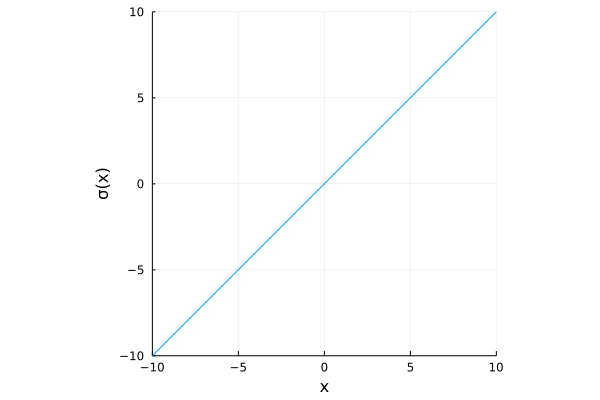

In [6]:
A = activation(θ2,Z,Identity)
plot(Z,A,xlims=(-10,10),ylims=(-10,10),aspect_ratio=:equal,legend = false, xlabel="x", ylabel="σ(x)",)

#### Unidad Lineal Rectificada (ReLU):
La neurona solo se activa si la suma es mayor que 0, esto es:

\begin{equation}
\sigma(x) = 
    \begin{cases} 
      0 & x\leq 0 \\
      x & 0 < x
   \end{cases}
\end{equation}

Es una función no-lineal computacionalmente eficiente.

In [7]:
function ReLU(x)
    if x > 0
        return x
    else
        return 0.0
    end
end

function dReLU(x)
    if x > 0
        return 1.0
    else
        return 0.0
    end
end;

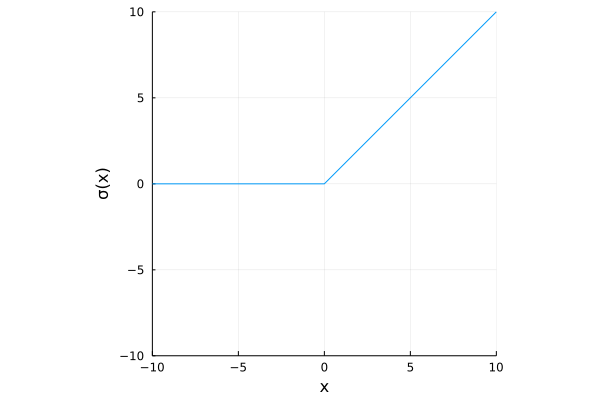

In [8]:
A = activation(θ2,Z,ReLU)
plot(Z,A,xlims=(-10,10),ylims=(-10,10),aspect_ratio=:equal,legend = false, xlabel="x", ylabel="σ(x)",)

#### Threshold:
También conocida como paso binario.  Si la suma esta por encima de un valor umbral, la neurona se activa, dando como output siempre el mismo valor de 1:
\begin{equation}
\sigma(x) = 
    \begin{cases} 
      0 & x\leq 0 \\
      1 & 0 < x
   \end{cases}
\end{equation}

In [9]:
function Binary(x)
    if x > 0
        return 1.0
    else
        return 0.0
    end
end

function dBinary(x)
    if x != 0
        return 0.0
    else
        return 1.0 #???
    end
end;

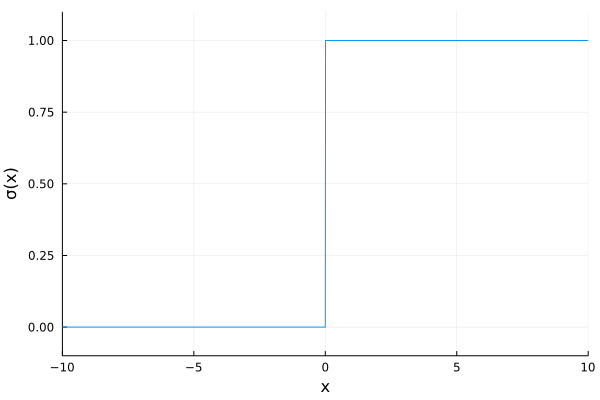

In [10]:
A = activation(θ2,Z,Binary)
plot(Z,A,xlims=(-10,10),ylims=(-0.1,1.1),legend = false, xlabel="x", ylabel="σ(x)",)

#### Sigmoide
Toma valores reales entre 0 y 1. Sumas grandes producen valores cercanos a 1.0, mientras que sumas muy negativas llevan a valores cercanos a 0.0.

\begin{equation}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}

Es suave y su utilidad recae en la cantidad de predicciones que requieren valores en este rango.

In [11]:
function Sigmoid(x)
    return 1/(1+exp(-x))
end

function dSigmoid(x)
    return Sigmoid(x)*(1-Sigmoid(x))
end;

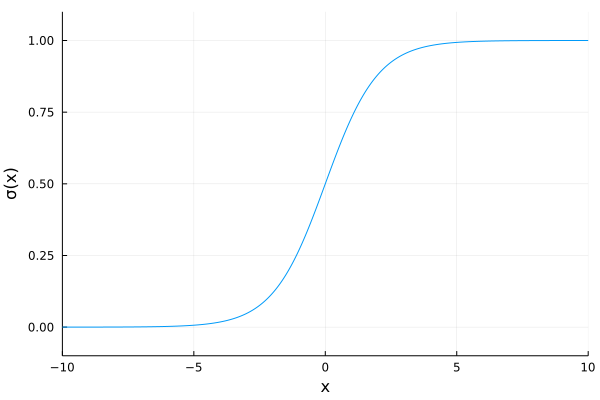

In [12]:
A = activation(θ2,Z,Sigmoid)
plot(Z,A,xlims=(-10,10),ylims=(-0.1,1.1),legend = false, xlabel="x", ylabel="σ(x)",)

### Tangente Hiperbólico
Es similar a la sigmoide, pero su rango comprende los valores entre -1 y 1.
\begin{equation}
\sigma(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{equation}
El output esta centrado en cero, por lo que se pueden mapear tanto dependencias negativas, neutrales y positivas.

In [13]:
function Tanh(x)
    return tanh(x)
end

function dTanh(x)
    return 1.0-tanh(x)^2
end;

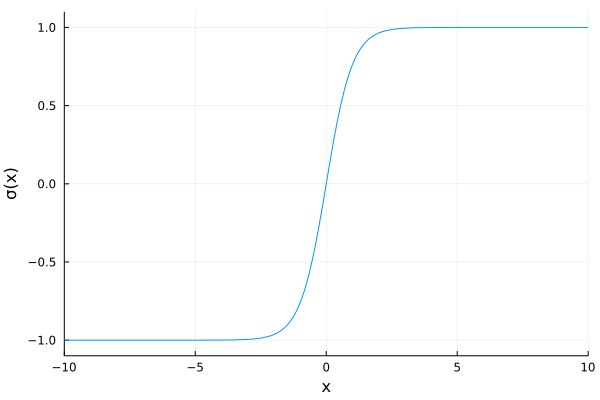

In [14]:
A = activation(θ2,Z,Tanh)
plot(Z,A,xlims=(-10,10),ylims=(-1.1,1.1),legend = false, xlabel="x", ylabel="σ(x)",)

#### Unidad Lineal Error Gausiano (GELU)

Matemáticamente se define como:

\begin{equation}
\sigma(x) = \frac{1}{2}x\left(1+erf\left(\frac{x}{\sqrt(2)}\right)\right)\\ = x\Phi(x)
\end{equation}

Donde $Φ(x)$ es la función de distribución acumulada de la distribución normal. Se escoge esta función ya que las inputs suelen seguir una distribución normal.

In [15]:
function GELU(x)
    return .5*x*(1+erf(x/sqrt(2)))
end

function dGELU(x)
    return .5*(1+erf(x/sqrt(2))) + x*2/sqrt(2*pi)*exp(-x^2/2)
end;

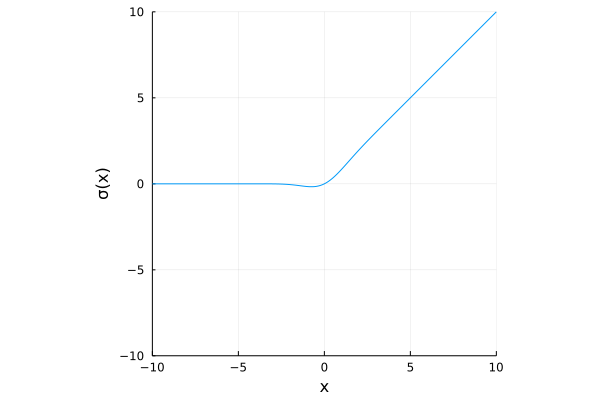

In [16]:
A = activation(θ2,Z,GELU)
plot(Z,A,xlims=(-10,10),ylims=(-10,10), aspect_ratio=:equal, legend = false, xlabel="x", ylabel="σ(x)",)

## Descenso por Gradiente 
<ul>
    <li>El perceptron es un paradigma que utiliza <b>aprendizaje supervizado</b>.</li>
    <li>La diferencia entre el output de la red y el valor esperado es la <b>función de costo</b>. Esta puede ser por ejemplo el <b>error cuadrático medio</b>:
    \begin{equation}
        C(w,b) = \text{MSE} = \frac{1}{N}\sum(\bar{Y}-Y)^2
    \end{equation}
     con
       \begin{equation}
        \bar{Y} = \sigma(S)
    \end{equation}
    </li>
    <li>En el <b>descenso por graidente</b> se empieza por trata de minimizar la función de costo a través de las derivadas parciales con respecto a los pesos y los bias:
    \begin{equation}
        \frac{\partial C}{\partial w_j} = \frac{\partial C}{\partial \bar{Y}}\frac{\partial \bar{Y}}{\partial S}\frac{\partial S}{\partial w_j} \\
        = 2\sum(\bar{Y}-Y)\sigma'(S)X
    \end{equation}
    y para el bias:
    \begin{equation}
        \frac{\partial C}{\partial b} = \frac{\partial C}{\partial \bar{Y}}\frac{\partial \bar{Y}}{\partial S}\frac{\partial S}{\partial b} \\
        = 2\sum(\bar{Y}-Y)\sigma'(S)
    \end{equation}
    Para actualizar los pesos (y los bias) se debe restar el gradiante a los valores originales:
    \begin{equation}
        w_j^{(n+1)} = w_j^{(n)} - \eta\partial_jC \\
        b^{(n+1)} = b^{(n)} - \eta\frac{\partial C}{\partial b}
    \end{equation}
        donde $\eta$ es la <b>taza de aprendizaje</b>.
    </li>
    <li>Tras varias <b>épocas</b>, los pesos y bias son actualizados hasta alcanzar idealmente un mínimo.</li>
</ul>

 | ![title](Images/gd.png)|
 |:--:|
 | <b>Intuición del descenso por gradiente. Tomado de [4]</b>|
 
 | ![title](Images/lr.png)|
 |:--:|
 | <b>Taza de aprendizaje. Tomado de [7]</b>|
 

In [17]:
function fcost(p::Perceptron,X,Y,σ)
    return sum((activation(p,X,σ) - Y).^2)
end

function gradient(p::Perceptron,X,Y,σ,dσ)
    p.grad_w = 2*transpose(dσ.(Predict(p,X)).*X)*(activation(p,X,σ)-Y)
    p.grad_bias = 2*transpose(dσ.(Predict(p,X)))*(activation(p,X,σ)-Y)
end

function optimizer(p::Perceptron,X,Y,σ,dσ)
    gradient(p,X,Y,σ,dσ)
    p.w -= p.learn_w.*p.grad_w
    p.bias -= p.learn_bias*p.grad_bias 
end

function training(p::Perceptron,X,Y,σ,dσ,epochs)
    history = zeros(epochs)
    for ii in 1:epochs
        history[ii] = fcost(p,X,Y,σ)
        optimizer(p,X,Y,σ,dσ)
    end
    return history
end;

### Ejemplo: Ajuste de un plano en el espacio

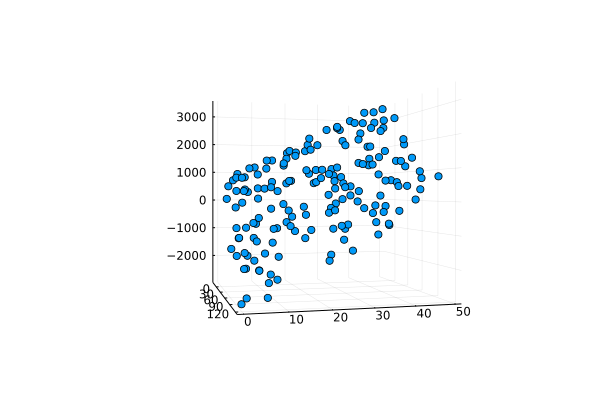

In [18]:
data = readdlm("data01.csv", ',', Float64)
X = data[:,2:3]
Y = data[:,4]
scatter(X[:,1],X[:,2],Y,camera = (75, 0),legend = false)

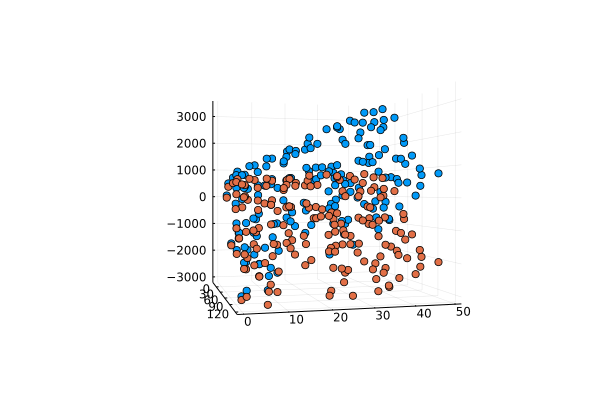

In [19]:
n = size(X,2)
Random.seed!(2)
θ = Perceptron(w = rand(-25:.01:25,n), bias = rand(0:.01:20))
Y2 = activation(θ,X,Identity)
scatter(X[:,1],X[:,2],[Y,Y2],camera = (75, 0),legend = false)

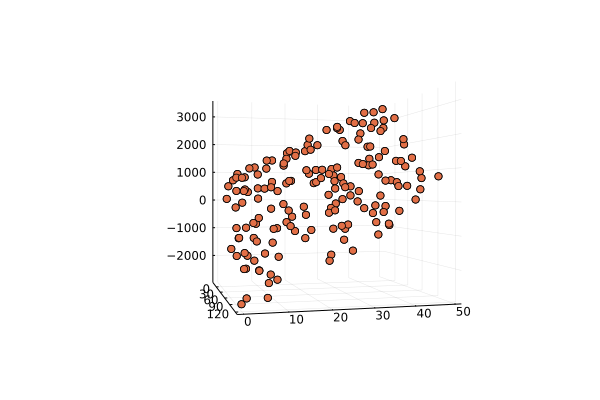

In [20]:
losss = training(θ,X,Y,Identity,dIdentity,900)
Y3 = activation(θ,X,Identity)
scatter(X[:,1],X[:,2],[Y,Y3],camera = (75, 0),legend = false)

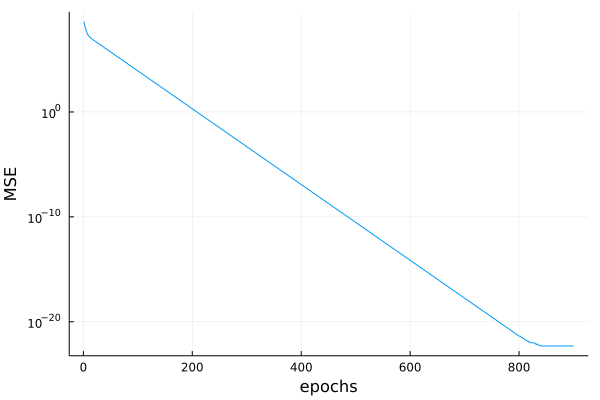

In [21]:
plot([1:1:900;],losss,yaxis=:log,legend = false,xlabel="epochs", ylabel="MSE")

# Perceptrón Multilayer y Backpropagation
| ![title](Images/BackPropagation.png)|
|:--:|
| <b>Algoritmo de Backpropagation en perceptrón con varias capas. Tomado de [4] </b>|

<ul>
    <li>Es necesario actualizar los pesos y bias de TODAS las neuronas en la red. Esto se hace de atrás hacia adelante por medio de la regla de la cadena:
     \begin{equation}
        \frac{\partial C}{\partial \bar{Y}^{\alpha}_i} = \sum_j\frac{\partial C}{\partial \bar{Y}^{\alpha+1}_j}\frac{\partial \bar{Y}^{\alpha+1}_j}{\partial S_j}\frac{\partial S_j}{\partial\bar{Y}^{\alpha}_i} \\
    \end{equation}
    donde
        \begin{equation}
        \frac{\partial S_j}{\partial\bar{Y}^{\alpha}_i} = w^{\alpha+1}_i
        \end{equation}
    </li>
    </ul>
  

### Ejemplo: Compuerta XOR
| ![title](Images/xor.jpeg)|
|:--:|
| <b>Tabla de verdad para compuerta XOR</b>|

In [46]:
X = [0. 1 0 1;0 0 1 1]
Y = [0. 1 1 0];

In [47]:
XOR = Chain(
    Dense(2, 3, sigmoid),
    Dense(3, 3, sigmoid),
    Dense(3, 1, sigmoid)
)

Chain(
  Dense(2 => 3, σ),                     # 9 parameters
  Dense(3 => 3, σ),                     # 12 parameters
  Dense(3 => 1, σ),                     # 4 parameters
)                   # Total: 6 arrays, 25 parameters, 484 bytes.

In [48]:
loss_fn(x, y) = Flux.mse(XOR(x), y)

loss_fn (generic function with 1 method)

In [49]:
opt = ADAM(1e-1)

Adam(0.1, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

## Stochastic Gradient Descent
<ul>
    <li>Por cada fila del data-set actualizo los parámetros de la red neuronal.</li>
    <li>Se gana velocidad y capacidad de exploración.</li>
    <li>Si en vez de actualizar por cada fila, divido los datos de entrenamiento en conjuntos pequeños, el método se conoce como <b>Mini-Batch Gradient Descent</b>.</li>
</ul>
 
 | ![title](Images/sgd.png)|
 |:--:|
 | <b>Stochastic Gradient Descent. Tomado de [7]</b>|
 
  | ![title](Images/Local.png)|
 |:--:|
 | <b>Mínimo local vs mínimo global. Tomado de [4]</b>|
 
## ADAM
<ul>
    <li>Abreviación de Adaptive Moment Estimation.</li>
    <li>Es una combinación de dos métodos diferentes que intentan reducir el zigzageo del SGD.</li>
</ul>

### SGD con Momentum

 | ![title](Images/Momemtum.png)|
 |:--:|
 | <b>SGD con y sin momentum. Tomado de [7]</b>|

<ul>
    <li>Simula la inercia de un objeto en movimiento.</li>
    <li>Matemáticamente, se vale del <b>Exponential Weighted Average</b>.
    \begin{equation}
        V_{t+1} = \beta V_t + (1-\beta)\theta_t
    \end{equation}
    con $|\beta| < 1$. Una expansión de la expresión de recurrencia aporta mayor claridad sobre como se calcula el promedio:
    \begin{equation}
        V_{t} = (1-\beta)(\theta_t+\theta_{t-1}+\beta^2\theta_{t-2}...+\beta^{t-1}\theta_1+\beta^t\theta_0)
    \end{equation}
    De esta forma, el descenso por gradiente se actualiza a
   \begin{equation}
        w_j^{t+1} = w_j^{t} + \eta (V_{dw_{t+1}})\\
        (V_{dw_j^{t+1}}) = \beta(V_{dw_t}) + (1-\beta)\frac{\partial C}{\partial w_j}
    \end{equation}</li>
</ul>
 
 | ![title](Images/EWA.png)|
 |:--:|
 | <b>Exponential Weighted Average. Tomado de [8]</b>|

### RMS-Prop
<ul>
    <li>Se usa un learning rate diferente en cada parámetro y este se actualiza constantemente.</li>
    <li>Matemáticamente, también se vale del <b>Exponential Weighted Average</b>.
   \begin{equation}
        w_j^{t+1} = w_j^{t} + \frac{\eta}{\sqrt{S_{dw}+\epsilon}} \frac{\partial C}{\partial w_j}\\
        S_{dw_{t+1}} = \beta(S_{dw_{t+1}})+ (1-\beta)\left(\frac{\partial C}{\partial w_j}\right)^2
    \end{equation}</li>
</ul>

En Adam, la actualización se realiza como:
\begin{equation}
        w_j^{t+1} = w_j^{t} + \frac{\eta}{\sqrt{S_{dw}+\epsilon}} (V_{dw_{t+1}})\\
        b_j^{t+1} = b_j^{t} + \frac{\eta}{\sqrt{S_{db}+\epsilon}} (V_{db_{t+1}})\\
    \end{equation}

In [50]:
parameters = Flux.params(XOR)

Params([Float32[-0.5041169 0.4182299; 0.32286793 -0.7002311; 0.92790437 0.9432977], Float32[0.0, 0.0, 0.0], Float32[-0.18036497 -0.74247885 0.03399837; -0.120648265 0.7317853 0.3508829; 0.74616516 0.5143305 0.5514505], Float32[0.0, 0.0, 0.0], Float32[-0.99546385 0.57012516 0.021101374], Float32[0.0]])

In [51]:
data = [(X, Y)]

1-element Vector{Tuple{Matrix{Float64}, Matrix{Float64}}}:
 ([0.0 1.0 0.0 1.0; 0.0 0.0 1.0 1.0], [0.0 1.0 1.0 0.0])

In [52]:
N = 5000
losss = zeros(N)
for ii in 1:N
    Flux.train!(loss_fn, parameters, data, opt)
    losss[ii] = loss_fn(X, Y)
end 

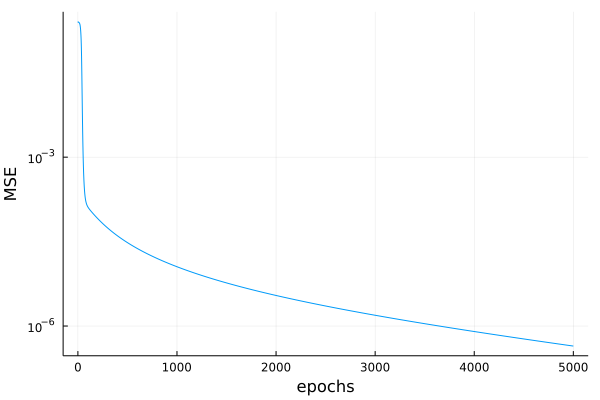

In [53]:
plot(losss,yaxis=:log,legend = false,xlabel="epochs", ylabel="MSE")

In [54]:
XOR(X)

1×4 Matrix{Float64}:
 0.000574117  0.999401  0.999375  0.000826119

# El database MNIST de dígitos escritos a mano
<ul>
    <li>Es un data set que contiene imagenes de números escritos a mano.</li>
</ul>

In [80]:
x_train, y_train = MLDatasets.MNIST.traindata()

([0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; … ;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [81]:
typeof(x_train[1][1])

N0f8 (alias for Normed{UInt8, 8})

In [82]:
MNIST.convert2image(MNIST.traintensor(1))

In [83]:
x_test, y_test = MLDatasets.MNIST.testdata()

([0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; … ;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [84]:
MNIST.convert2image(MNIST.testtensor(1))

In [85]:
x_train = Float32.(x_train)

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

In [86]:
y_train = Flux.onehotbatch(y_train, 0:9)

10×60000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [87]:
model = Chain(
    Dense(784, 256, relu),
    Dense(256, 10, relu)
)

Chain(
  Dense(784 => 256, relu),              # 200_960 parameters
  Dense(256 => 10, relu),               # 2_570 parameters
)                   # Total: 4 arrays, 203_530 parameters, 795.289 KiB.

In [88]:
loss(x, y) = Flux.Losses.logitcrossentropy(model(x), y)

loss (generic function with 1 method)

## Cross-Entropy
<ul>
    <li>Utiliza la función de activación <b>Softmax</b></li> 
    <li>La entropía de una variable aleatoria $X$ es el nivel de incertidumbre de la variable con respecto a los posibles outcomes
    \begin{equation}
    S(X) = - \sum^n_{i=1} p_i log_2(p_i)
    \end{equation}</li>
    <li>Cross-Entropy se define como:
    \begin{equation}
    L_{CE} = - \sum^n_{i=1} t_i log_2(p_i)
    \end{equation}
    donde $t_i$ es la probabilidad deseada, mientras $p_i$ es aquella que entrega el modelo.
    </li>
</ul>

 | ![title](Images/Dog.png)|
 |:--:|
 | <b>Softmax para red con múltiples outpus. Tomado de [9].</b>|

In [89]:
opt = ADAM(0.0001)

Adam(0.0001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [90]:
parameters = Flux.params(model)
train_data = [(Flux.flatten(x_train), y_train)]
for i in 1:400
    Flux.train!(loss, parameters, train_data, opt)
end

In [106]:
test_data = [(Flux.flatten(x_test), y_test)];

In [104]:
model(test_data[1][1][:, 1])

10-element Vector{Float32}:
 0.770592
 0.0
 1.7985513
 3.0463395
 0.0
 0.46924773
 0.0
 8.80482
 0.42909303
 2.6323106

In [108]:
findmax(model(test_data[1][1][:, 1]))

(8.80482f0, 8)

In [91]:
accuracy = 0
for i in 1:length(y_test)
    if findmax(model(test_data[1][1][:, i]))[2] - 1  == y_test[i]
        accuracy += 1
    end
end
println(accuracy / length(y_test))

0.9228


Backpropagtion no es el único algoritmo para actualiar los pesos. Existen más métodos basados en derivadas de la función de costo como lo son el <b>RPROP Learning Algorithm</b> y el <b>Levenberg-Marquardt Learning Algorithm</b>. Otros como el <b>Genetic Algorithm</b> y el <b>Particle Swarm Optimization</b> son inspirados por los procesos que experimentan los seres vivos y por como interactuan entre ellos.

# Bibliografía
<ol>
    <li>Yadav, N., Yadav, A., & Kumar, S. R. I. P. M. (2015). An Introduction to Neural Network Methods for Differential Equations (2015 ed.). Springer.</li>
    <li>3Blue1Brown. (2017, 5 octubre). But what is a neural network? | Chapter 1, Deep learning [Vídeo]. YouTube. https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi</li>
    <li>Nielsen, M. A. (2015). How the backpropagation algorithm works. Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap2.html</li>
    <li>Daoud, M. (2022, 30 marzo). Neurons, Activation Functions, Back-Propagation, Epoch, Gradient Descent: What are these? Medium. https://towardsdatascience.com/neurons-activation-functions-back-propagation-epoch-gradient-descent-what-are-these-c80349c6c452</li>
    <li>Mikuła, P. (2022, 16 abril). Simple MNIST recognition in Julia using Flux. DEV Community 👩‍💻👨‍💻. https://dev.to/piotrek124/simple-mnist-recognition-in-julia-using-flux-2fg5</li>
    <li>Baheti, P. (2022, 19 julio). Activation Functions in Neural Networks [12 Types & Use Cases]. V7. https://www.v7labs.com/blog/neural-networks-activation-functions</li>
    <li>M. (2022, 12 febrero). Optimizers in Deep Learning - MLearning.ai. Medium. https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0</li>
    <li>Momentum Optimizer in Deep Learning | Explained in Detail. (2021, 21 agosto). [Vídeo]. YouTube. https://www.youtube.com/watch?v=Vce8w1sy0e8</li>
    <li>Koech, K. E. (2021, 16 diciembre). Softmax Activation Function — How It Actually Works. Medium. https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78</li>
</ol>